## Dynamic graph construction

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
tickers = pd.read_csv('data/tickers_list.csv')['Symbol'].tolist()
#tickers

In [3]:
df = pd.read_csv('data/values.csv')
df = df[df['Symbol'].isin(tickers)]
df = df[['Symbol','Date','Close']]
#df.set_index('Symbol', inplace=True)
df['Date'] = pd.to_datetime(df['Date'],utc=True)
df['Date'] = df['Date'].dt.date
close_prices = df.pivot(index='Date', columns='Symbol', values='Close')
close_prices

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UBER,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-30,160.191223,142.832901,93.888420,271.087067,381.899994,46.912163,97.879997,221.357010,181.795547,102.000000,...,31.190001,446.575714,186.125885,165.494400,31.145750,217.816422,32.086514,34.781727,47.004471,99.518150
2023-03-31,162.697281,144.144363,95.954185,274.108063,385.369995,47.420654,98.010002,221.586166,184.651047,103.290001,...,31.700001,448.979309,188.847046,168.005951,31.672907,220.853073,32.277409,34.781727,47.578838,99.672676
2023-04-03,163.950317,145.094040,96.266891,274.136871,380.079987,47.477142,96.559998,224.051804,181.723282,102.410004,...,31.459999,469.500122,187.233139,167.772110,31.312677,224.320755,32.551296,35.098091,47.978954,105.553398
2023-04-04,163.417526,144.515198,97.413490,274.136871,385.149994,46.959248,95.870003,226.884033,183.846863,103.949997,...,31.389999,468.607086,183.798859,165.078674,30.803106,223.008118,32.908180,34.251354,47.507847,104.544510
2023-04-05,161.572495,145.437759,98.749611,269.811523,382.019989,47.307655,92.559998,232.236938,184.967377,101.099998,...,31.120001,483.788727,182.231857,164.030746,30.847029,223.507690,33.289955,34.325783,48.295185,106.335083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-06,262.359985,223.929993,127.779999,275.929993,335.989990,78.070000,214.350006,330.170013,175.820007,240.929993,...,85.540001,348.970001,233.619995,105.220001,56.080002,357.559998,40.299999,96.389999,114.339996,121.050003
2026-01-07,260.329987,233.419998,127.040001,273.980011,338.100006,77.070000,210.020004,341.640015,169.440002,241.559998,...,86.190002,341.700012,224.479996,105.410004,54.869999,355.880005,40.130001,94.290001,112.720001,118.489998
2026-01-08,259.040009,224.130005,126.180000,281.820007,339.040009,77.900002,204.679993,330.109985,170.330002,246.289993,...,87.589996,346.850006,229.850006,106.970001,55.529999,352.230011,40.570000,95.599998,113.070000,122.910004


In [4]:
return_threshold=0.01

In [5]:
# ---------------------------------------------------------
# 1. Daily Movement Labeling
# ---------------------------------------------------------
# Formula: return = p_t / p_{t-1} - 1
returns = close_prices.pct_change()

# Initialize all labels as 0 (Neutral)
labels = pd.DataFrame(0, index=returns.index, columns=returns.columns)

# Apply thresholding logic:
# Upward trend (+1): return > positive threshold
labels[returns > return_threshold] = 1

# Downward trend (-1): return < negative threshold
labels[returns < -return_threshold] = -1

# Drop the first row (NaN from pct_change)
labels = labels.iloc[1:]

/tmp/ipykernel_10400/4291660237.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = close_prices.pct_change()


In [6]:
labels

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UBER,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,1,0,1,1,0,1,0,0,1,1,...,1,0,1,1,1,1,0,0,1,0
2023-04-03,0,0,0,0,-1,0,-1,1,-1,0,...,0,1,0,0,-1,1,0,0,0,1
2023-04-04,0,0,1,0,1,-1,0,1,1,1,...,0,0,-1,-1,-1,0,1,-1,0,0
2023-04-05,-1,0,1,-1,0,0,-1,1,0,-1,...,0,1,0,0,0,0,1,0,1,1
2023-04-06,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-06,-1,1,1,1,1,-1,-1,1,0,1,...,1,1,0,1,1,1,0,0,1,-1
2026-01-07,0,1,0,0,0,-1,-1,1,-1,0,...,0,-1,-1,0,-1,0,0,-1,-1,-1
2026-01-08,0,-1,0,1,0,1,-1,-1,0,1,...,1,1,1,1,1,-1,1,1,0,1


In [7]:
window_size = 20
t = window_size+30  # Delta_t

timestamps = labels.index

current_date = timestamps[t]
        
# Extract the sequence for the window [t - Delta_t + 1 : t]
# Shape: (Window_Size, Num_Stocks)
window_data = labels.iloc[t-window_size : t]

# Transpose to (Num_Stocks, Window_Size) so each row is a stock's sequence
stock_sequences = window_data.values.T 

# -----------------------------------------------------
# 3. Similarity Measurement (Manhattan Distance)
# -----------------------------------------------------
# We use scipy's cdist with 'cityblock' (Manhattan) metric.
# This calculates Equation (6) efficiently for all pairs.
# d_ij = sum(|l_s^i - l_s^j|)
dist_matrix = cdist(stock_sequences, stock_sequences, metric='cityblock')

In [8]:
stock_sequences

array([[ 0,  0,  0, ...,  1,  0,  1],
       [ 0, -1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  1, ...,  0,  0,  0],
       [ 0, -1,  0, ...,  1,  0,  0],
       [ 0, -1,  1, ...,  0,  0,  0]])

In [9]:
dist_matrix

array([[ 0., 13., 11., ..., 15.,  7., 15.],
       [13.,  0.,  6., ..., 14., 10., 12.],
       [11.,  6.,  0., ..., 12., 10., 12.],
       ...,
       [15., 14., 12., ...,  0., 12., 10.],
       [ 7., 10., 10., ..., 12.,  0., 12.],
       [15., 12., 12., ..., 10., 12.,  0.]])

In [10]:
max_dist_threshold = 6
adj_matrix = np.where(dist_matrix <= max_dist_threshold, 1, 0)

In [11]:
np.fill_diagonal(adj_matrix, 0)  # No self-loops
adj_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

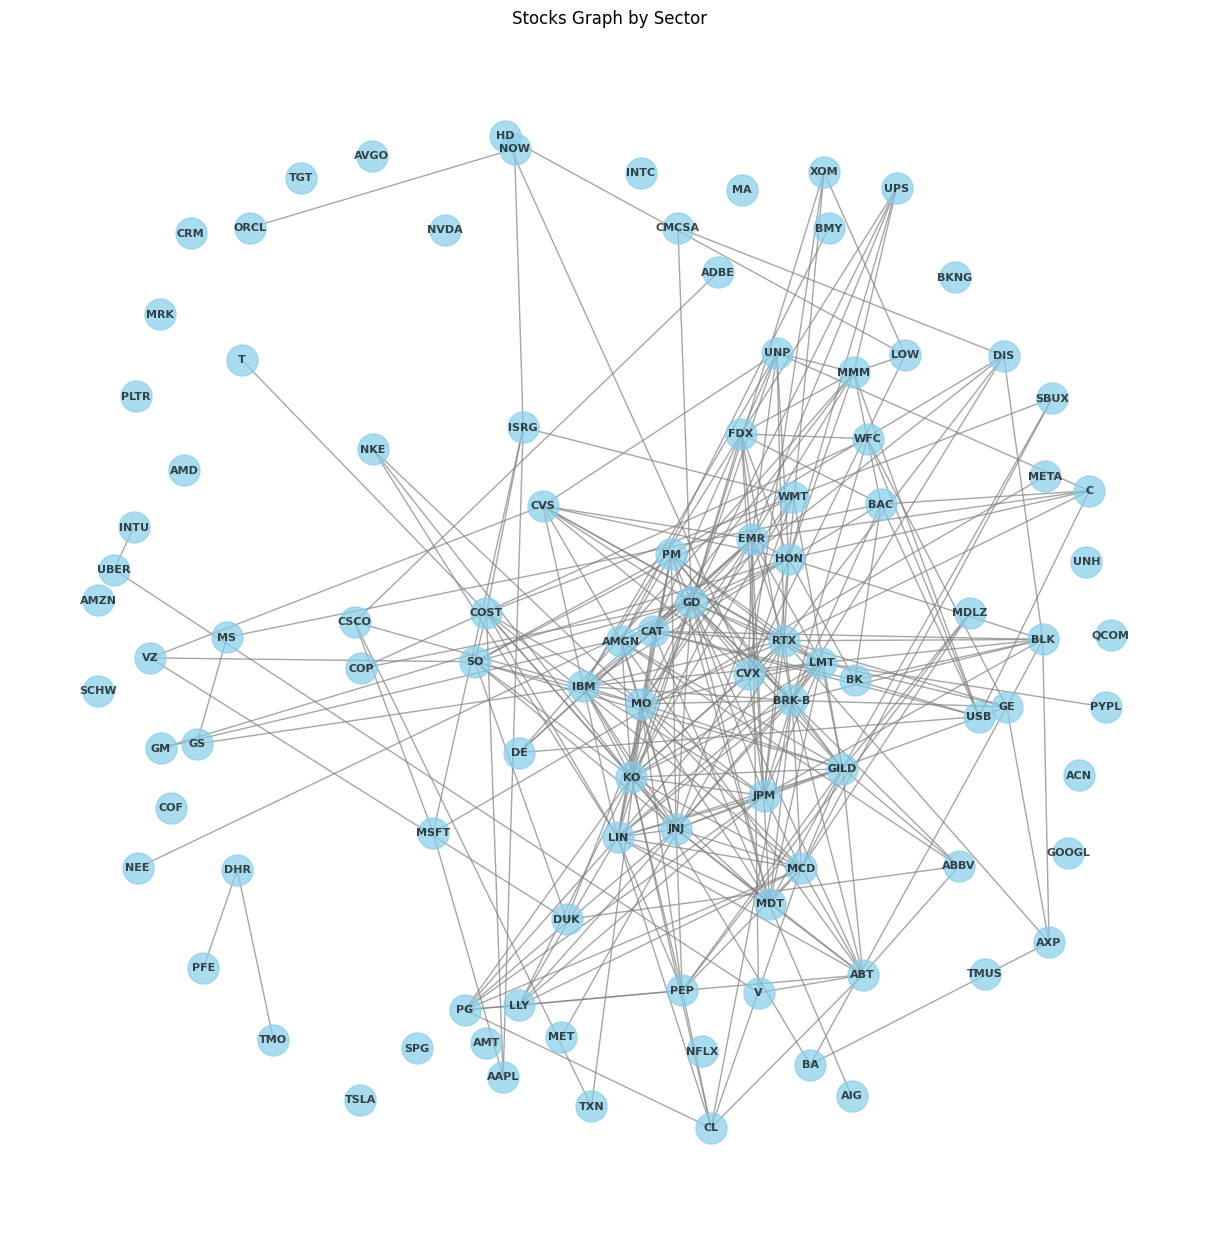

In [12]:
stocks_graph = nx.from_numpy_array(adj_matrix)
stocks_graph = nx.relabel_nodes(stocks_graph, dict(enumerate(tickers)))

# 2. CONVERT to a NetworkX Graph Object (This is the missing step)
G = stocks_graph

# 3. Now draw the Graph object 'G', not the matrix
plt.figure(figsize=(12, 12)) # Increased height for better visibility

# Calculate layout based on the Graph object G
pos = nx.spring_layout(G, k=0.5, iterations=20) 

nx.draw(
    G,                  # Pass G here
    pos=pos,            # Use the calculated layout
    with_labels=True, 
    node_size=500, 
    node_color='skyblue', 
    font_size=8, 
    font_weight='bold', 
    font_color='black',
    edge_color='gray',  # Added explicitly to ensure edges are visible
    alpha=0.7           # Transparency
)

plt.title('Stocks Graph by Sector')
plt.show()